# Question 5: An Exploration of the Ratings
### Is there a Correlation between MetaScores and Gross Revenue, IMDB Ratings for the top 250 grossing films at the US box office in the last decade?


### Findings: 
We found that revenue have no correlation with Ratings.
Also interesting, that there is a high correlation between imdb ratings and metascores, suggesting that critics and individuals have similiar views.

The average Metascore for these films is only 62. It is interesting that only 60% of these films received positive reviews. With 17 of these films receiving unfavourable reviews. Only 22 films gained a Metascore of over 81, achieving must see status.


### Deeper Dive


Let’s look at the Grown-ups franchise, created by Adam Sandler. The first film, released in 2010, received a Metascore of only 30, meaning it received generally unfavourable reviews from the critics. This didn’t stop its success at the box office though, taking home 162m at the US Box office, ranking 148th for the decade. The sequel, Grown-ups 2, received even worse reviews, with a Metascore of 19, meaning critics voiced their overwhelming dislike for the film. Despite this, it still grossed $133 million at the US box office, ranking 189th for the decade.!

# Importing Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../cleandata/webscrape_top500grossfilms.csv', index_col = 0)

In [3]:
df.head()

,movie,imdb_rating,meta_score,runtime,gross,n_imdb
0,Star Wars: The Force Awakens,7.9,80.0,138,936.66,79.0
1,Black Panther,7.3,88.0,134,700.06,73.0
2,Avengers: Infinity War,8.5,68.0,149,678.82,85.0
3,Jurassic World,7.0,59.0,124,652.27,70.0
4,The Avengers,8.0,69.0,143,623.28,80.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 6 columns):
movie          250 non-null object
imdb_rating    250 non-null float64
meta_score     250 non-null float64
runtime        250 non-null int64
gross          250 non-null float64
n_imdb         250 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 13.7+ KB


# Checking for Correlation 

In [5]:
df.corr()

,imdb_rating,meta_score,runtime,gross,n_imdb
imdb_rating,1.000000,0.750389,0.332263,0.286261,1.000000
meta_score,0.750389,1.000000,0.209758,0.256892,0.750389
runtime,0.332263,0.209758,1.000000,0.268408,0.332263
gross,0.286261,0.256892,0.268408,1.000000,0.286261
n_imdb,1.000000,0.750389,0.332263,0.286261,1.000000


# Comparing Distributions of IMDB Ratings and Metascore Ratings

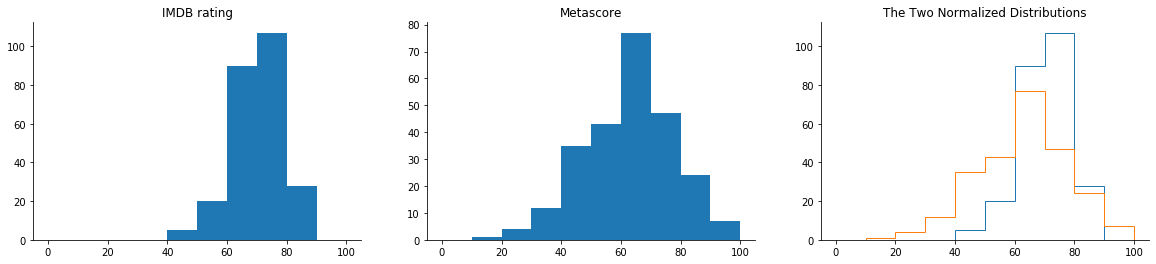

In [6]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20,4))
ax1, ax2, ax3 = fig.axes
ax1.hist(df['n_imdb'], bins = 10, range = (0,100))
ax1.set_title('IMDB rating')

ax2.hist(df['meta_score'], bins = 10, range = (0,100)) # bin range = 10
ax2.set_title('Metascore')

ax3.hist(df['n_imdb'], bins = 10, range = (0,100), histtype = 'step')
ax3.hist(df['meta_score'], bins = 10, range = (0,100), histtype = 'step')

ax3.set_title('The Two Normalized Distributions')

for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.show()



# Comparing Metascore with gross revenue, runtime 


Text(0, 0.5, 'IMDB Rating')

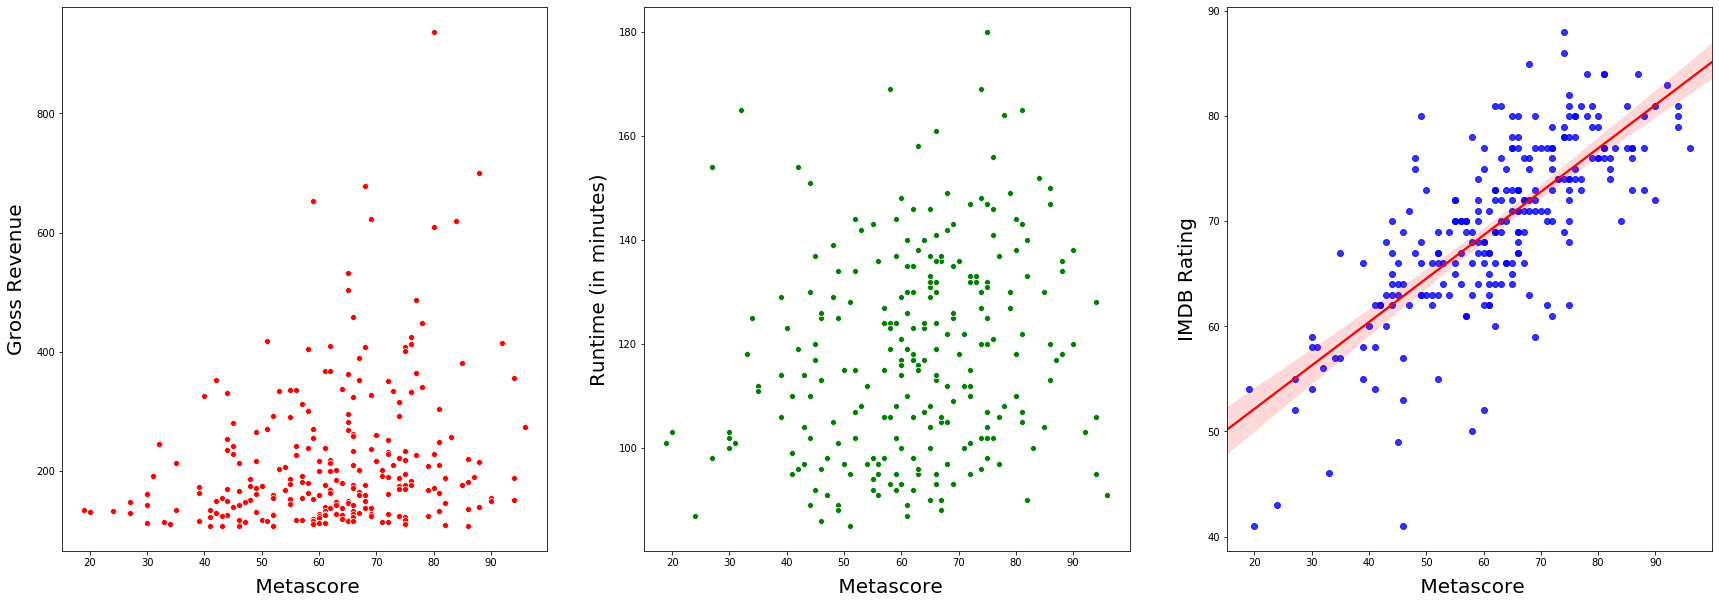

In [7]:
new_figure = plt.figure(figsize=(40,10))

# Add a subplot to the figure - a new axes
ax1 = new_figure.add_subplot(141)
ax2 = new_figure.add_subplot(142)
ax3 = new_figure.add_subplot(143)

sns.scatterplot(x='meta_score', y='gross',data= df, color = 'red', ax=ax1)
sns.scatterplot(x='meta_score', y='runtime',data= df, color = 'green', ax=ax2)
sns.regplot(x='meta_score', y='n_imdb',data= df, color = 'blue', ax=ax3, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

ax1.set_xlabel(' Metascore',labelpad =10, size = 20)
ax2.set_xlabel(' Metascore',labelpad =10, size = 20)
ax3.set_xlabel(' Metascore',labelpad =10, size = 20)

ax1.set_ylabel('Gross Revenue', labelpad = 10, size = 20)
ax2.set_ylabel('Runtime (in minutes)', labelpad = 10, size =20)
ax3.set_ylabel('IMDB Rating', labelpad = 10, size =20)


# Comparing Runtime with IMBD and Meta

Text(0, 0.5, 'IMDB Rating')

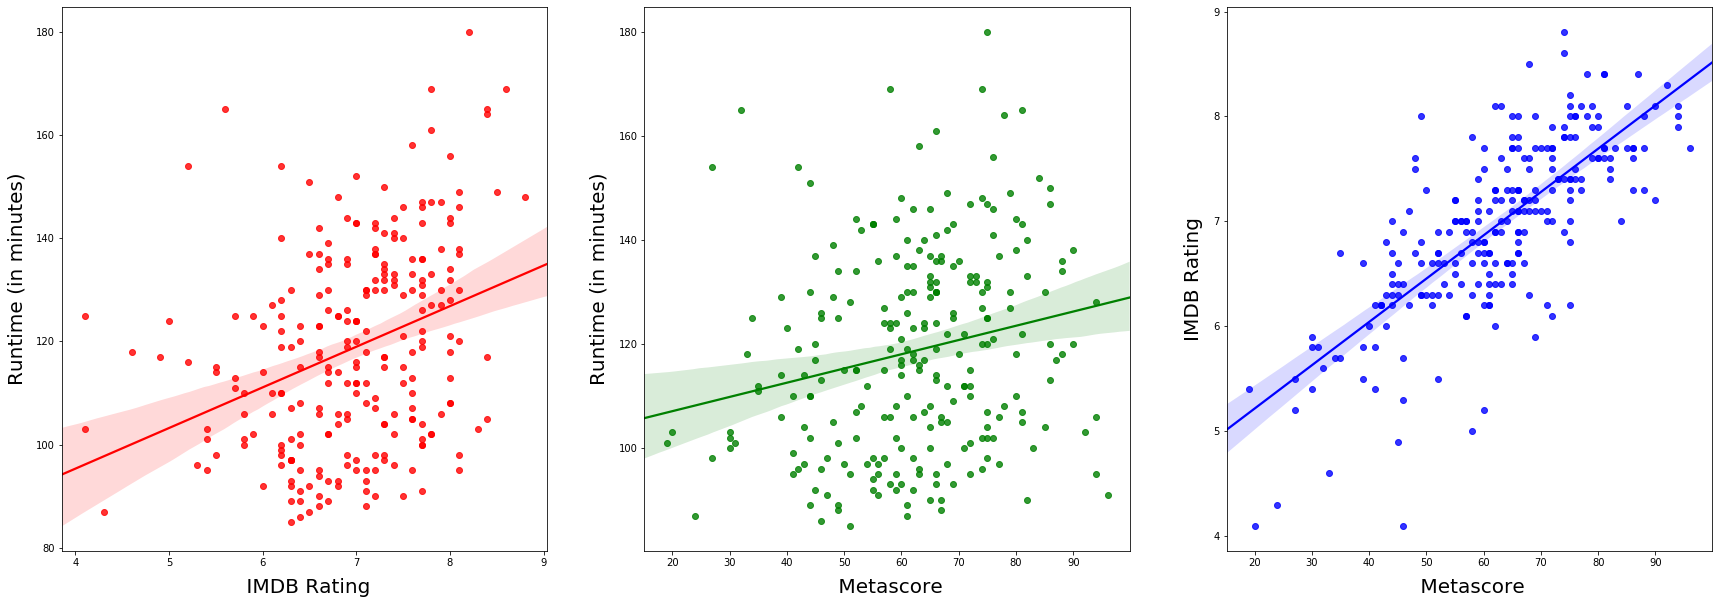

In [8]:
new_figure = plt.figure(figsize=(40,10))

# Add a subplot to the figure - a new axes
ax1 = new_figure.add_subplot(141)
ax2 = new_figure.add_subplot(142)
ax3 = new_figure.add_subplot(143)

sns.regplot(x='imdb_rating', y='runtime',data= df, color = 'red', ax=ax1)
sns.regplot(x='meta_score', y='runtime',data= df, color = 'green', ax=ax2)
sns.regplot(x='meta_score', y='imdb_rating',data= df, color = 'blue', ax=ax3)


ax1.set_xlabel(' IMDB Rating',labelpad =10, size = 20)
ax2.set_xlabel(' Metascore',labelpad =10, size = 20)
ax3.set_xlabel(' Metascore',labelpad =10, size = 20)


ax1.set_ylabel('Runtime (in minutes)', labelpad = 10, size = 20)
ax2.set_ylabel('Runtime (in minutes)', labelpad = 10, size =20)
ax3.set_ylabel('IMDB Rating', labelpad = 10, size =20)


# Comparing Revenue at box office with Ratings

The correlation Coefficient between Metascore and US Box Office Revenue is: 0.25689151122449566
The correlation Coefficient between Metascore and IMDB Ratings is: 0.7503891573166286


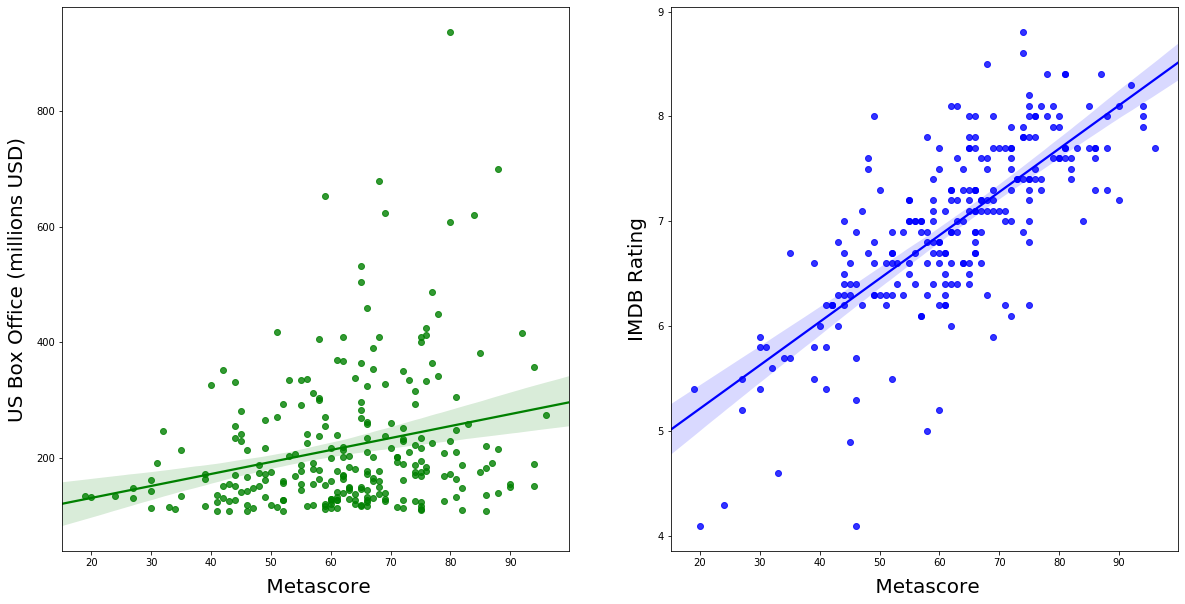

In [38]:
new_figure = plt.figure(figsize=(20,10))

# Add a subplot to the figure - a new axes
ax2 = new_figure.add_subplot(121)
ax3 = new_figure.add_subplot(122)

sns.regplot(x='meta_score', y='gross',data= df, color = 'green', ax=ax2)
sns.regplot(x='meta_score', y='imdb_rating',data= df, color = 'blue', ax=ax3)


ax2.set_xlabel(' Metascore',labelpad =10, size = 20)
ax3.set_xlabel(' Metascore',labelpad =10, size = 20)


ax2.set_ylabel('US Box Office (millions USD)', labelpad = 10, size =20)
ax3.set_ylabel('IMDB Rating', labelpad = 10, size =20)

print(f"The correlation Coefficient between Metascore and US Box Office Revenue is: {df.corr()['meta_score']['gross']}") 
print(f"The correlation Coefficient between Metascore and IMDB Ratings is: {df.corr()['meta_score']['imdb_rating']}") 
 
    

# Comparing IMDB Ratings with gross revenue, runtime and metascore rating


Text(0, 0.5, 'MetaScore')

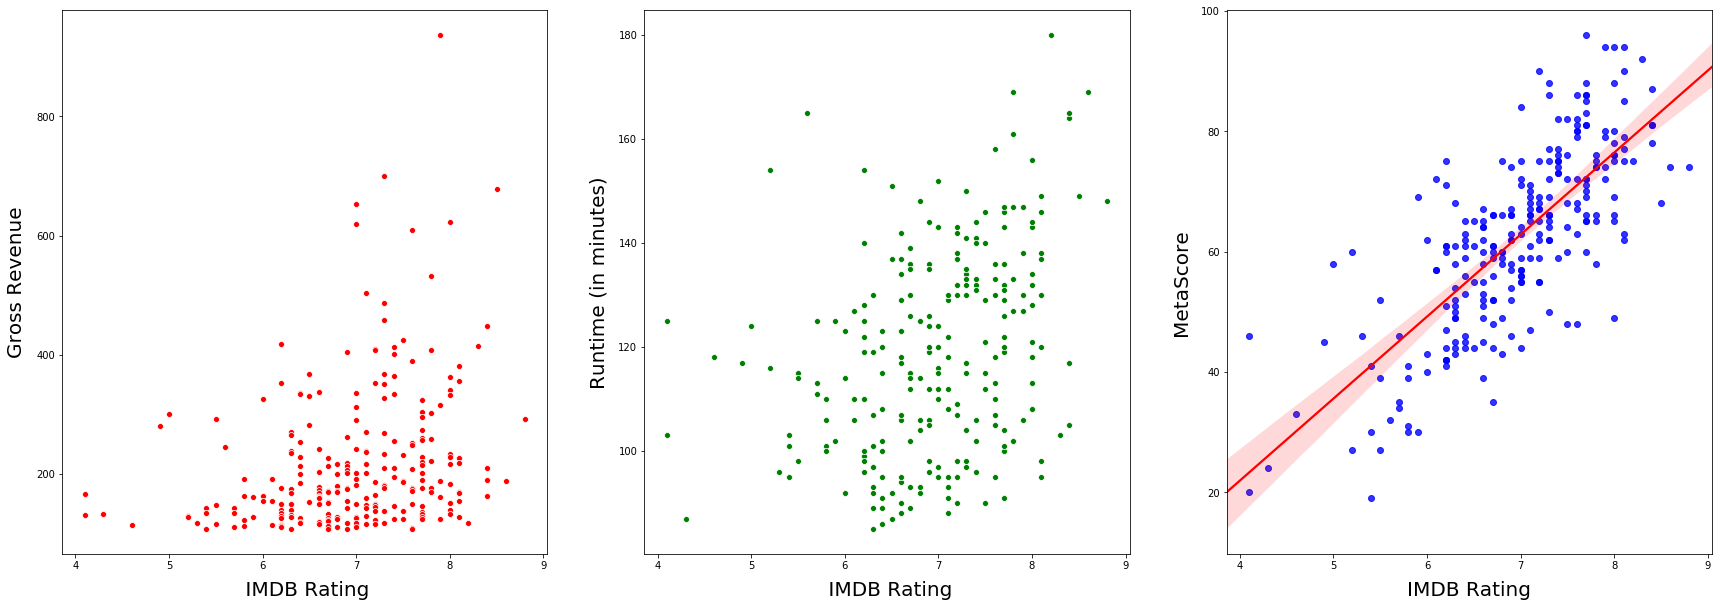

In [9]:
new_figure = plt.figure(figsize=(40,10))

# Add a subplot to the figure - a new axes
ax1 = new_figure.add_subplot(141)
ax2 = new_figure.add_subplot(142)
ax3 = new_figure.add_subplot(143)

sns.scatterplot(x='imdb_rating', y='gross',data= df, color = 'red', ax=ax1)
sns.scatterplot(x='imdb_rating', y='runtime',data= df, color = 'green', ax=ax2)
sns.regplot(x='imdb_rating', y='meta_score',data= df, color = 'blue', ax=ax3, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

ax1.set_xlabel(' IMDB Rating',labelpad =10, size = 20)
ax2.set_xlabel(' IMDB Rating',labelpad =10, size = 20)
ax3.set_xlabel('IMDB Rating', labelpad =10, size = 20)

ax1.set_ylabel('Gross Revenue', labelpad = 10, size = 20)
ax2.set_ylabel('Runtime (in minutes)', labelpad = 10, size =20)
ax3.set_ylabel('MetaScore', labelpad = 10, size =20)


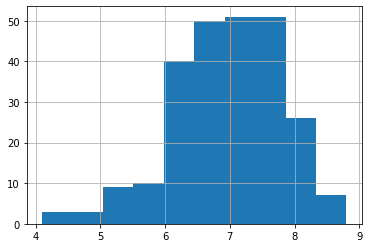

In [36]:
df['imdb_rating'].hist()

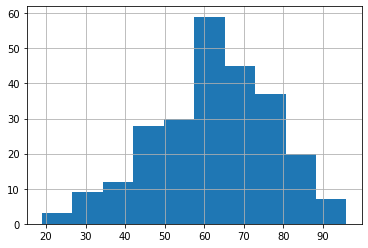

In [10]:
df['meta_score'].hist()

The correlation Coefficient between Metascore and US Box Office Revenue is: 0.25689151122449566
The correlation Coefficient between Metascore and runtime is: 0.20975835772244092


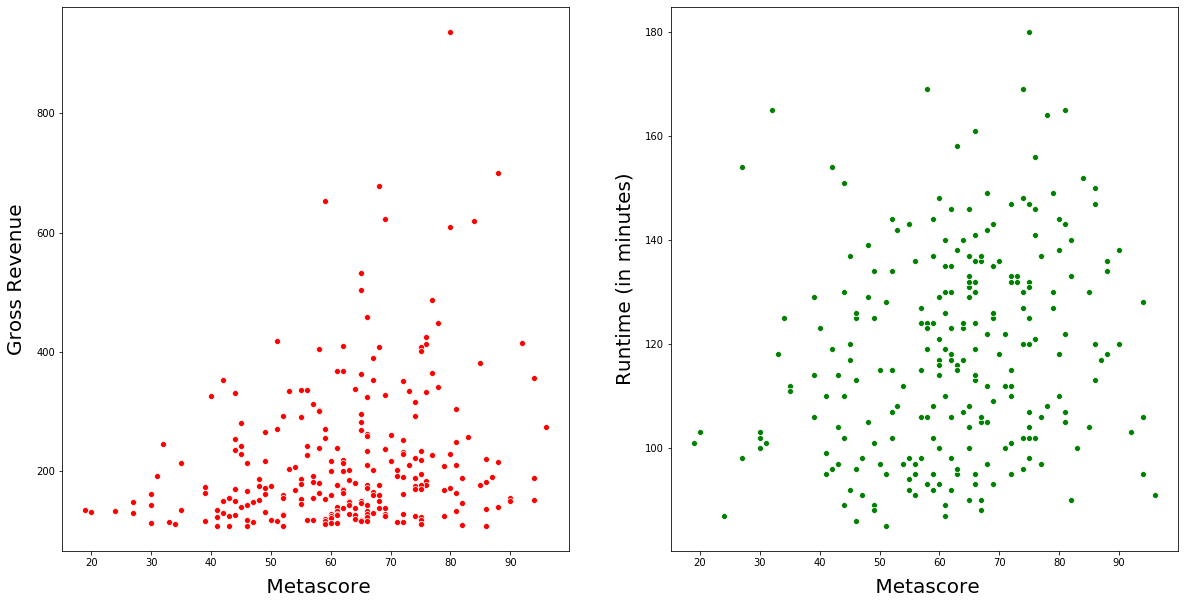

In [39]:
new_figure = plt.figure(figsize=(20,10))

# Add a subplot to the figure - a new axes
ax1 = new_figure.add_subplot(121)
ax2 = new_figure.add_subplot(122)

sns.scatterplot(x='meta_score', y='gross',data= df, color = 'red', ax=ax1)
sns.scatterplot(x='meta_score', y='runtime',data= df, color = 'green', ax=ax2)

ax1.set_xlabel(' Metascore',labelpad =10, size = 20)
ax2.set_xlabel(' Metascore',labelpad =10, size = 20)

ax1.set_ylabel('Gross Revenue', labelpad = 10, size = 20)
ax2.set_ylabel('Runtime (in minutes)', labelpad = 10, size =20)
print(f"The correlation Coefficient between Metascore and US Box Office Revenue is: {df.corr()['meta_score']['gross']}") 
print(f"The correlation Coefficient between Metascore and runtime is: {df.corr()['meta_score']['runtime']}") 


# Exploring how these movies fit into rating blocks

In [12]:
# 22 of the top 150 films got must-see award in metacritic
df.loc[df['meta_score']> 81].count()

movie          22
imdb_rating    22
meta_score     22
runtime        22
gross          22
n_imdb         22
dtype: int64

In [13]:
# 147 out of the 250 top grossing films recevied positive 
df.loc[df['meta_score']> 60].count()

movie          147
imdb_rating    147
meta_score     147
runtime        147
gross          147
n_imdb         147
dtype: int64

# Deeper dive - Grown ups

In [14]:
df.loc[df['meta_score']< 20]

,movie,imdb_rating,meta_score,runtime,gross,n_imdb
189,Grown Ups 2,5.4,19.0,101,133.67,54.0


In [15]:
df.loc[df['movie'].str.contains('Grown')]

,movie,imdb_rating,meta_score,runtime,gross,n_imdb
148,Grown Ups,5.9,30.0,102,162.00,59.0
189,Grown Ups 2,5.4,19.0,101,133.67,54.0


In [16]:
df.sort_values(by = 'gross',ascending = False).head(20)

,movie,imdb_rating,meta_score,runtime,gross,n_imdb
0,Star Wars: The Force Awakens,7.9,80.0,138,936.66,79.0
1,Black Panther,7.3,88.0,134,700.06,73.0
2,Avengers: Infinity War,8.5,68.0,149,678.82,85.0
3,Jurassic World,7.0,59.0,124,652.27,70.0
4,The Avengers,8.0,69.0,143,623.28,80.0
5,Star Wars: The Last Jedi,7.0,84.0,152,620.18,70.0
6,Incredibles 2,7.6,80.0,118,608.58,76.0
7,Rogue One,7.8,65.0,133,532.18,78.0
8,Beauty and the Beast,7.1,65.0,129,504.01,71.0
9,Finding Dory,7.3,77.0,97,486.30,73.0


In [17]:
df.loc[df['meta_score']< 40]

,movie,imdb_rating,meta_score,runtime,gross,n_imdb
66,Transformers: Age of Extinction,5.6,32.0,165,245.44,56.0
91,Venom,6.7,35.0,112,213.52,67.0
107,Teenage Mutant Ninja Turtles,5.8,31.0,101,191.20,58.0
131,Pirates of the Caribbean: Salazar's Revenge,6.6,39.0,129,172.56,66.0
144,Clash of the Titans,5.8,39.0,106,163.21,58.0
148,Grown Ups,5.9,30.0,102,162.00,59.0
170,Little Fockers,5.5,27.0,98,148.38,55.0
178,The Smurfs,5.4,30.0,103,142.61,54.0
188,Identity Thief,5.7,35.0,111,134.51,57.0
189,Grown Ups 2,5.4,19.0,101,133.67,54.0
